(a)(b)(c)

Error: 0.0025
Error: 0.0238
Error: 0.0088
Error: 0.0088
Error: 0.0013
Error: 0.0000
Error: 0.0000


Text(0.5, 1.0, 'error VS szie')

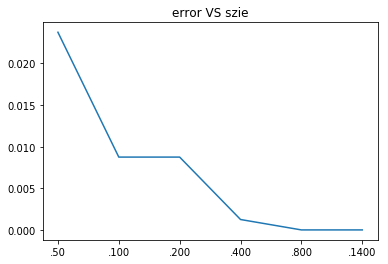

In [5]:
import numpy as np
import matplotlib.pyplot as plt

tau = 8.

def readMatrix(file):
    fd = open(file, 'r')
    hdr = fd.readline()
    rows, cols = [int(s) for s in fd.readline().strip().split()]
    tokens = fd.readline().strip().split()
    matrix = np.zeros((rows, cols))
    Y = []
    for i, line in enumerate(fd):
        nums = [int(x) for x in line.strip().split()]
        Y.append(nums[0])
        kv = np.array(nums[1:])
        k = np.cumsum(kv[:-1:2])
        v = kv[1::2]
        matrix[i, k] = v
    #化为正负1
    category = (np.array(Y) * 2) - 1
    return matrix, tokens, category

def svm_train(matrix, category):
    state = {}
    M, N = matrix.shape
    #####################
    #大于0的化为1
    matrix = 1.0 * (matrix > 0)
    '''
    #构造kernel矩阵
    d1 = np.sum(matrix ** 2, axis=1).reshape(-1, 1)
    d2 = d1.T
    squared = matrix.dot(matrix.T)
    dist = d1 + d2 - 2 * squared
    k = np.exp(- dist / (2 * (tau ** 2)))
    '''
    gram = matrix.dot(matrix.T)
    squared = np.sum(matrix*matrix, axis=1)
    k = np.exp(-(squared.reshape((-1,1)) + squared.reshape((1,-1)) - 2 * gram) / (2 * (tau ** 2)))
    
    #初始化向量
    alpha = np.zeros(M)
    #循环次数
    n = 40
    #系数
    L = 1. / (64 * M)
    #平均值
    alpha_avg = np.zeros(M)
    
    for j in range(n * M):
        #随机取一个更新的维度
        i = int(np.random.rand() * M)
        #计算函数间隔
        margin = category[i] * (k[i, :].dot(alpha))
        #只改变第i个分量
        grad = M * L * k[:, i] * alpha[i]
        if(margin < 1):
            grad -= category[i] * k[:, i]
        alpha -= grad / ((np.sqrt(j+1)))
        alpha_avg += alpha
    
    alpha_avg /= (n * M)
    
    state['alpha'] = alpha
    state['alpha_avg'] = alpha_avg
    state['Xtrain'] = matrix
    state['Sqtrain'] = squared
    
    ####################
    return state


def svm_test(matrix, state):
    M, N = matrix.shape
    output = np.zeros(M)
    ###################
    Xtrain = state['Xtrain']
    Sqtrain = state['Sqtrain']
    #大于0的化为1
    matrix = 1.0 * (matrix > 0)
    #做测试集的kernel
    gram = matrix.dot(Xtrain.T)
    squared = np.sum(matrix * matrix, axis=1)
    k = np.exp(-(squared.reshape((-1, 1)) + Sqtrain.reshape((1, -1)) - 2 * gram) / (2 * (tau**2)))
    #读取alpha
    alpha_avg = state['alpha_avg']
    #预测
    pred = k.dot(alpha_avg)
    output = np.sign(pred)
    
    ###################
    return output

def evaluate(output, label):
    error = (output != label).sum() * 1. / len(output)
    print('Error: %1.4f' % error)
    return error

def svm(file):
    trainMatrix, tokenlist, trainCategory = readMatrix(file)
    testMatrix, tokenlist, testCategory = readMatrix('MATRIX.TEST')
    
    state = svm_train(trainMatrix, trainCategory)
    output = svm_test(testMatrix, state)
    
    return evaluate(output, testCategory)


trainMatrix, tokenlist, trainCategory = readMatrix('MATRIX.TRAIN.400')
testMatrix, tokenlist, testCategory = readMatrix('MATRIX.TEST')

state = svm_train(trainMatrix, trainCategory)
output = svm_test(testMatrix, state)

evaluate(output, testCategory)

size = ['.50','.100','.200','.400','.800','.1400']
size1 = [50, 100, 200, 400, 800, 1400]
train = "MATRIX.TRAIN"
error = []
for i in size:
    file = train+i
    error.append(svm(file))
    
plt.plot(size, error)
plt.title("error VS szie")

(d)

Error: 0.0025
Error: 0.0163
Error: 0.0075
Error: 0.0025
Error: 0.0025
Error: 0.0000
Error: 0.0000


Text(0.5, 1.0, 'error VS szie')

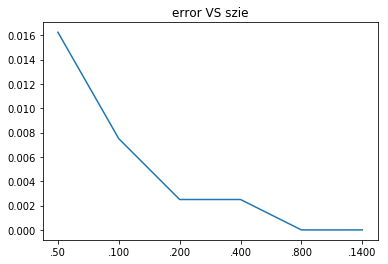

In [6]:
import numpy as np
import matplotlib.pyplot as plt

tau = 8.

def readMatrix(file):
    fd = open(file, 'r')
    hdr = fd.readline()
    rows, cols = [int(s) for s in fd.readline().strip().split()]
    tokens = fd.readline().strip().split()
    matrix = np.zeros((rows, cols))
    Y = []
    for i, line in enumerate(fd):
        nums = [int(x) for x in line.strip().split()]
        Y.append(nums[0])
        kv = np.array(nums[1:])
        k = np.cumsum(kv[:-1:2])
        v = kv[1::2]
        matrix[i, k] = v
    #化为正负1
    category = (np.array(Y) * 2) - 1
    return matrix, tokens, category

def svm_train(matrix, category):
    state = {}
    M, N = matrix.shape
    #####################
    #大于0的化为1
    matrix = 1.0 * (matrix > 0)
    '''
    #构造kernel矩阵
    d1 = np.sum(matrix ** 2, axis=1).reshape(-1, 1)
    d2 = d1.T
    squared = matrix.dot(matrix.T)
    dist = d1 + d2 - 2 * squared
    k = np.exp(- dist / (2 * (tau ** 2)))
    '''
    gram = matrix.dot(matrix.T)
    squared = np.sum(matrix*matrix, axis=1)
    k = np.exp(-(squared.reshape((-1,1)) + squared.reshape((1,-1)) - 2 * gram) / (2 * (tau ** 2)))
    
    #初始化向量
    alpha = np.zeros(M)
    #循环次数
    n = 40
    #系数
    L = 1. / (64 * M)
    #平均值
    alpha_avg = np.zeros(M)
    
    for j in range(n * M):
        #随机取一个样本
        i = int(np.random.rand() * M)
        #计算函数间隔
        margin = category[i] * (k[i, :].dot(alpha))
        #grad = M * L * k[:, i] * alpha[i]
        grad = L * k.dot(alpha)
        if(margin < 1):
            grad -= category[i] * k[:, i]
        alpha -= grad / ((np.sqrt(j+1)))
        alpha_avg += alpha
    
    alpha_avg /= (n * M)
    
    state['alpha'] = alpha
    state['alpha_avg'] = alpha_avg
    state['Xtrain'] = matrix
    state['Sqtrain'] = squared
    
    ####################
    return state


def svm_test(matrix, state):
    M, N = matrix.shape
    output = np.zeros(M)
    ###################
    Xtrain = state['Xtrain']
    Sqtrain = state['Sqtrain']
    #大于0的化为1
    matrix = 1.0 * (matrix > 0)
    #做测试集的kernel
    gram = matrix.dot(Xtrain.T)
    squared = np.sum(matrix * matrix, axis=1)
    k = np.exp(-(squared.reshape((-1, 1)) + Sqtrain.reshape((1, -1)) - 2 * gram) / (2 * (tau**2)))
    #读取alpha
    alpha_avg = state['alpha_avg']
    #预测
    pred = k.dot(alpha_avg)
    output = np.sign(pred)
    
    ###################
    return output

def evaluate(output, label):
    error = (output != label).sum() * 1. / len(output)
    print('Error: %1.4f' % error)
    return error

def svm(file):
    trainMatrix, tokenlist, trainCategory = readMatrix(file)
    testMatrix, tokenlist, testCategory = readMatrix('MATRIX.TEST')
    
    state = svm_train(trainMatrix, trainCategory)
    output = svm_test(testMatrix, state)
    
    return evaluate(output, testCategory)


trainMatrix, tokenlist, trainCategory = readMatrix('MATRIX.TRAIN.400')
testMatrix, tokenlist, testCategory = readMatrix('MATRIX.TEST')

state = svm_train(trainMatrix, trainCategory)
output = svm_test(testMatrix, state)

evaluate(output, testCategory)

size = ['.50','.100','.200','.400','.800','.1400']
size1 = [50, 100, 200, 400, 800, 1400]
train = "MATRIX.TRAIN"
error = []
for i in size:
    file = train+i
    error.append(svm(file))
    
plt.plot(size, error)
plt.title("error VS szie")